In [18]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [20]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
hermite_dir += diradd+"/"

In [21]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "MSE" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")
    elif "est" in f:
        est =(np.load(hermite_dir+f, allow_pickle=True))
    elif "true" in f:
        true =(np.load(hermite_dir+f, allow_pickle=True))


/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHF/Ridge_fQuadSinHF_DriftEvalExp_10240NPaths_3906e-03dT_MSEs.parquet


In [22]:
print(mse.index[np.argmin(mse.values.flatten()).flatten()])

Int64Index([24], dtype='int64', name='index')


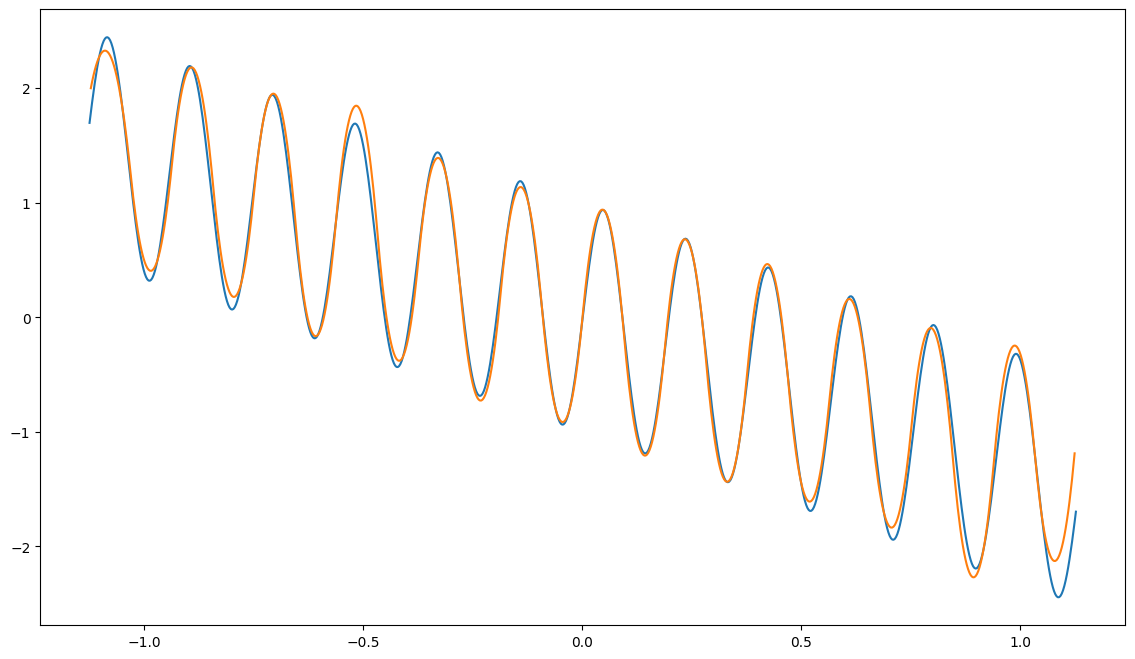

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
plt.plot(np.linspace(-1.5, 1.5, 1024), true, label="true")
plt.plot(np.linspace(-1.5, 1.5, 1024), est, label="est")
plt.show()

In [24]:
print

<function print>